# EDA

**EDA** significa **Exploratory Data Analysis** o **Análisis Exploratorio de Datos**.
Es una etapa clave en cualquier proyecto de datos —incluido Big Data— en la que **exploras, entiendes y limpias tus datos antes de aplicar modelos o algoritmos avanzados**.

### **¿En qué consiste el EDA?**

El EDA implica:

✅ **Inspeccionar la estructura de los datos**

* Número de filas y columnas, tipos de variables (numéricas, categóricas, fechas, texto).
* Identificar valores faltantes o duplicados.

✅ **Calcular estadísticas descriptivas**

* Medias, medianas, modas, máximos, mínimos, desviaciones estándar, percentiles.
* Distribuciones y tendencias de cada variable.

✅ **Detectar relaciones y patrones**

* Correlaciones entre variables.
* Análisis de outliers (valores atípicos).
* Identificación de agrupamientos naturales o anomalías.

✅ **Visualizar los datos**

* Histogramas, diagramas de caja (boxplots), matrices de correlación, gráficas de dispersión, mapas de calor, etc.

---

### 📌 **¿Y en Big Data qué cambia?**

En el contexto de **Big Data**, el EDA sigue teniendo los mismos objetivos, pero enfrenta retos adicionales:

🔹 **Volumen:** Las bases de datos son enormes, por lo que no siempre puedes cargarlas completas en memoria. Se utilizan muestreos, herramientas distribuidas (Spark, Hadoop) o dashboards para explorar de forma escalable.

🔹 **Variedad:** Los datos pueden venir de múltiples fuentes (texto, imágenes, sensores IoT, logs) y debes transformarlos antes de analizarlos.

🔹 **Velocidad:** A veces el análisis debe ser casi en tiempo real, usando streaming analytics o herramientas como Kafka + Spark.

🔹 **Veracidad:** Es más común encontrar datos ruidosos o inconsistentes, por lo que la limpieza y validación son fundamentales.

# 📚 Librerias

In [2]:
# Importar las librerías necesarias en Python para EDA
import missingno as msno
import pandas as pd  # Para manejar datos en tablas (DataFrames)
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns  # Para gráficos avanzados
import numpy as np  # Para cálculos numéricos
from scipy.stats import skew, iqr  # Para cálculo de la asimetría y rango intercuartil

# 🔎 Inspeccionar la estructura de datos

## 📄📥 Cargar el archivo

In [3]:
# Leer los datos
data_ej1 = pd.read_csv('sillaut.csv')  # Leer el archivo CSV y cargarlo en un DataFrame

# Dimensiones del conjunto de datos
print(data_ej1.shape)  # Imprimir la dimensión (filas, columnas)

(400, 11)


### Imprimir las primeras filas del dataset

In [4]:
print(data_ej1.iloc[:, :5].head())  # Imprimir las primeras 5 columnas de las primeras filas

   Ventas  PrecioComp  Ingresos  Presup.Publicidad  Poblacion
0    9.50         138        73                 11        276
1   11.22         111        48                 16        260
2   10.06         113        35                 10        269
3    7.40         117       100                  4        466
4    4.15         141        64                  3        340


### Imprimir las últimas filas del dataset

In [5]:
print(data_ej1.tail())  # Imprimir las últimas filas del dataset

     Ventas  PrecioComp  Ingresos  Presup.Publicidad  Poblacion  PrecioVenta  \
395   12.57         138       108                 17        203          128   
396    6.14         139        23                  3         37          120   
397    7.41         162        26                 12        368          159   
398    5.94         100        79                  7        284           95   
399    9.71         134        37                  0         27          120   

    CalidadUbic  EdadM  NEducacion Ubicacion   US  
395        Good     33          14       Yes  Yes  
396      Medium     55          11        No  Yes  
397      Medium     40          18       Yes  Yes  
398         Bad     50          12       Yes  Yes  
399        Good     49          16       Yes  Yes  


### Obtener la estructura de los datos (tipo de variables, etc.)

- Ventas: ventas unitarias (miles).
- PrecioComp: Precio cobrado por la competencia.
- Ingresos: Nivel de ingresos de la comunidad (miles).
- Presup.Publicidad: Presupuesto de publicidad local.
- Poblacion: Tamaño de la población en la región.
- PrecioVenta: Precio que cobra la empresa.
- CalidadUbic: la calidad de la ubicación de las estanterías.
- EdadM: edad promedio de la población local.
- NEducacion: nivel de educación de la población local.
- Ubicacion: si está en ubicación urbana o no.
- US: si la tienda está en US.

In [7]:
print(data_ej1.info())  # Información sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ventas             400 non-null    float64
 1   PrecioComp         400 non-null    int64  
 2   Ingresos           400 non-null    int64  
 3   Presup.Publicidad  400 non-null    int64  
 4   Poblacion          400 non-null    int64  
 5   PrecioVenta        400 non-null    int64  
 6   CalidadUbic        400 non-null    object 
 7   EdadM              400 non-null    int64  
 8   NEducacion         400 non-null    int64  
 9   Ubicacion          400 non-null    object 
 10  US                 400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


# 🧮 Calcular estadísticas descriptivas

## Descripción estadística de las variables numéricas

In [ ]:

print("\nDescripción estadística de las variables numéricas:")
print(data_ej1.describe())


Descripción estadística de las variables numéricas:
           Ventas  PrecioComp    Ingresos  Presup.Publicidad   Poblacion  \
count  400.000000  400.000000  400.000000         400.000000  400.000000   
mean     7.496325  124.975000   68.657500           6.635000  264.840000   
std      2.824115   15.334512   27.986037           6.650364  147.376436   
min      0.000000   77.000000   21.000000           0.000000   10.000000   
25%      5.390000  115.000000   42.750000           0.000000  139.000000   
50%      7.490000  125.000000   69.000000           5.000000  272.000000   
75%      9.320000  135.000000   91.000000          12.000000  398.500000   
max     16.270000  175.000000  120.000000          29.000000  509.000000   

       PrecioVenta       EdadM  NEducacion  
count   400.000000  400.000000  400.000000  
mean    115.795000   53.322500   13.900000  
std      23.676664   16.200297    2.620528  
min      24.000000   25.000000   10.000000  
25%     100.000000   39.750000   12.0

## Verificar valores faltantes

In [9]:
# Verificar valores faltantes
missing_data = data_ej1.isnull().sum()

# Filtrar solo columnas con valores faltantes
missing_data = missing_data[missing_data > 0]

# Comprobar si hay columnas con valores faltantes
if missing_data.empty:
    print("No hay valores faltantes en las columnas.")
else:
    # Gráfico de barras de valores faltantes
    plt.figure(figsize=(10, 6))
    missing_data.plot(kind='bar', color='skyblue')
    plt.title('Cantidad de Valores Faltantes por Columna')
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de Valores Faltantes')
    plt.xticks(rotation=45)
    plt.show()



No hay valores faltantes en las columnas.


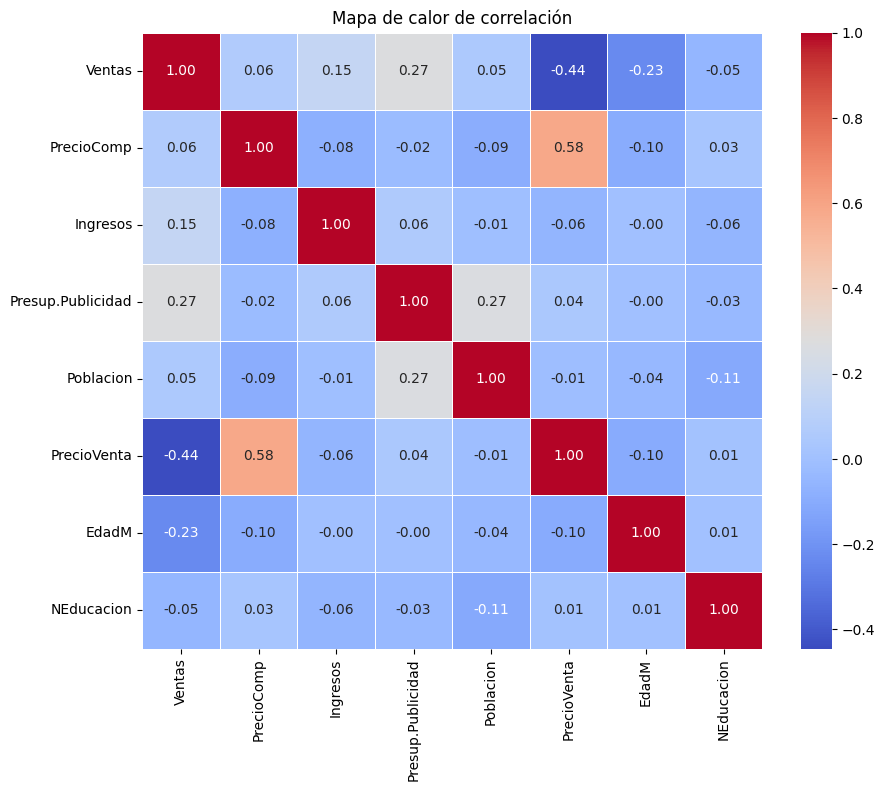

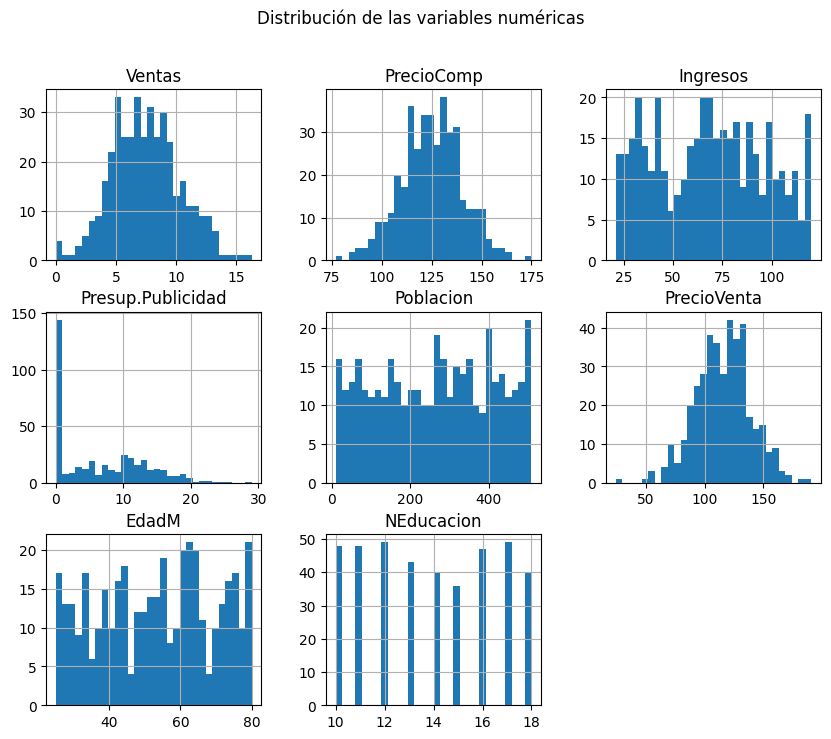

In [10]:
# Filtrar solo las columnas numéricas para evitar el error
data_numerica = data_ej1.select_dtypes(include=[np.number])

# Visualización de la correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data_numerica.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()

# Histograma de las variables numéricas
data_numerica.hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

In [11]:
# Analizar variables categóricas
# Función para crear una tabla de frecuencias
def tb_freq(x):
    f_i = x.value_counts()  # Frecuencia absoluta
    F_i = f_i.cumsum()  # Frecuencia acumulada
    h_i = f_i / len(x)  # Frecuencia relativa
    H_i = F_i / len(x)  # Frecuencia relativa acumulada
    freq_table = pd.DataFrame({
        'Frecuencia Absoluta': f_i,
        'Frecuencia Acumulada': F_i,
        'Frecuencia Relativa': h_i,
        'Frecuencia Relativa Acumulada': H_i
    })
    return freq_table
# Aplicar la función a una variable
print(tb_freq(data_ej1['CalidadUbic']))  # Tabla de frecuencias para la variable 'CalidadUbic'
print(tb_freq(data_ej1['Ubicacion']))  # Tabla de frecuencias para la variable 'Ubicacion'

             Frecuencia Absoluta  Frecuencia Acumulada  Frecuencia Relativa  \
CalidadUbic                                                                   
Medium                       219                   219               0.5475   
Bad                           96                   315               0.2400   
Good                          85                   400               0.2125   

             Frecuencia Relativa Acumulada  
CalidadUbic                                 
Medium                              0.5475  
Bad                                 0.7875  
Good                                1.0000  
           Frecuencia Absoluta  Frecuencia Acumulada  Frecuencia Relativa  \
Ubicacion                                                                   
Yes                        282                   282                0.705   
No                         118                   400                0.295   

           Frecuencia Relativa Acumulada  
Ubicacion                  

C:\Users\guill\AppData\Local\Temp\ipykernel_9524\538369197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ubicacion', data=data_ej1, palette='Set2')  # Gráfico de barras para la variable 'Ubicacion'


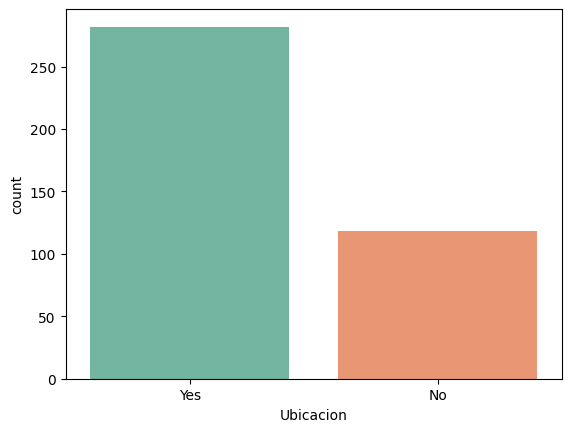

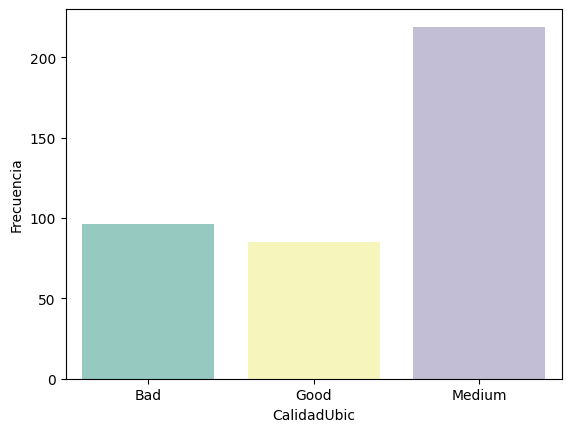

In [12]:
# Crear un gráfico de barras
sns.countplot(x='Ubicacion', data=data_ej1, palette='Set2')  # Gráfico de barras para la variable 'Ubicacion'
plt.show()

# Gráfico de barras con 'ggplot' equivalente en Python
sns.countplot(x='CalidadUbic', data=data_ej1, hue='CalidadUbic', palette='Set3')  # Gráfico similar a ggplot
plt.xlabel('CalidadUbic')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
# Análisis de variables numéricas
# Medidas estadísticas
print(f"Media de Ventas: {data_ej1['Ventas'].mean():.4f}")  # Media
print(f"Mediana de Ventas: {data_ej1['Ventas'].median():.4f}")  # Mediana

Media de Ventas: 7.4963
Mediana de Ventas: 7.4900


In [14]:

# Cuartiles
Q1 = data_ej1['Ventas'].quantile(0.25)
Q3 = data_ej1['Ventas'].quantile(0.75)
print(f"Q1: {Q1}, Q3: {Q3}")


Q1: 5.390000000000001, Q3: 9.32


In [15]:
# Calcular IQR de Ventas
Q1 = data_ej1['Ventas'].quantile(0.25)
Q3 = data_ej1['Ventas'].quantile(0.75)
IQR = Q3 - Q1

# Varianza
print(f"Varianza de Ventas: {data_ej1['Ventas'].var():.4f}")  # Varianza

# Desviación estándar
print(f"Desviación estándar de Ventas: {data_ej1['Ventas'].std():.4f}")  # Desviación estándar

# Rango intercuartil (IQR)
print(f"IQR de Ventas: {IQR:.4f}")  # IQR

# Coeficiente de asimetría (skewness)
from scipy.stats import skew
print(f"Coeficiente de asimetría de Ventas: {skew(data_ej1['Ventas']):.4f}")

# Coeficiente de variación
CV = lambda x: x.std() / x.mean()  # Función para calcular el coeficiente de variación
print(f"Coeficiente de variación de Ventas: {CV(data_ej1['Ventas']):.4f}")


Varianza de Ventas: 7.9756
Desviación estándar de Ventas: 2.8241
IQR de Ventas: 3.9300
Coeficiente de asimetría de Ventas: 0.1849
Coeficiente de variación de Ventas: 0.3767


In [16]:
# Resumen de medidas estadísticas
summary_stats = data_ej1.describe().transpose()  # Resumen estadístico de las variables numéricas
summary_stats['skew'] = data_ej1.apply(lambda x: skew(x) if x.dtype != 'O' else np.nan)  # Agregar skew
summary_stats['CV'] = data_ej1.apply(lambda x: CV(x) if x.dtype != 'O' else np.nan)  # Agregar CV
summary_stats.to_csv('sumdesc.csv')  # Guardar el resumen en un archivo CSV

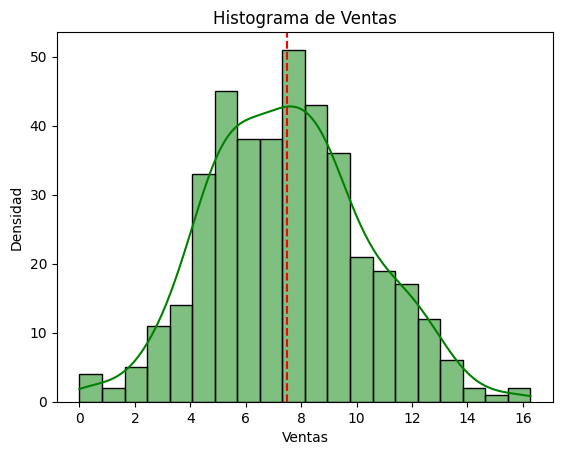

In [17]:

# Histograma y curva de densidad
sns.histplot(data_ej1['Ventas'], kde=True, color='green', bins=20)  # Histograma con densidad
plt.axvline(data_ej1['Ventas'].mean(), color='red', linestyle='--')  # Línea de la media
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.title('Histograma de Ventas')
plt.show()

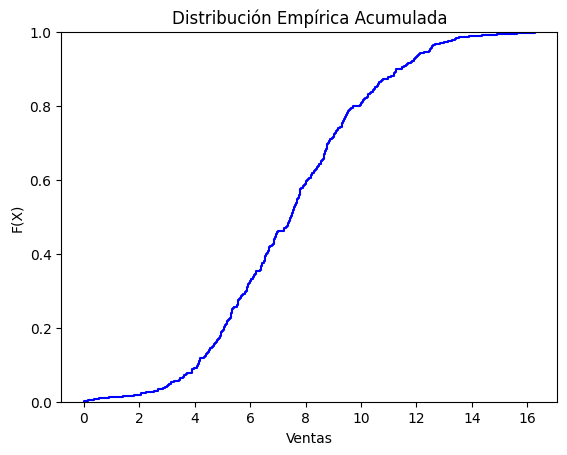

In [18]:

# Distribución empírica acumulada
sns.ecdfplot(data_ej1['Ventas'], color='blue')  # Distribución acumulada empírica
plt.xlabel('Ventas')
plt.ylabel('F(X)')
plt.title('Distribución Empírica Acumulada')
plt.show()


In [ ]:

# Diagrama de Pareto
# Frecuencias para las causas
freq_caus = [6, 22, 13, 2, 5]
causes = ['fluct.pot', 'contr.inest', 'error.oper', 'herramgast', 'otra']

# Crear gráfico de Pareto
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(causes, freq_caus, color='skyblue')  # Barras
ax.set_ylabel('Frecuencia')
ax.set_title('Diagrama de Pareto')
plt.xticks(rotation=45)
plt.show()
